<a href="https://colab.research.google.com/github/MuhammedAshraf2020/HandWrittenDigitRecognizerUsingKerasAndFlask/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Data**

In [1]:
from keras.datasets.mnist import load_data

In [2]:
(X_train ,y_train ) , (X_test , y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout

In [5]:
X_train = X_train / 255
X_test  = X_test / 255
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [6]:
import keras

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [9]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(32 , kernel_size = (3 , 3) , strides = (1 , 1) , input_shape = (28 , 28 , 1)) , 
    keras.layers.MaxPooling2D(pool_size = (2 , 2) ) , 
    keras.layers.Conv2D(64 , kernel_size = (3 , 3)) , 
    keras.layers.MaxPooling2D(pool_size = (2 , 2)) , 
    Flatten(),
    Dense(120 , activation = "relu") , 
    Dropout(0.4) , 
    Dense(84 , activation = "relu") ,
    Dense(10, activation="softmax"),

])

In [10]:
Callback_check = keras.callbacks.ModelCheckpoint(
    "/content", monitor='val_accuracy', verbose = 1 , save_best_only=True,
    save_weights_only = False, mode='auto', save_freq='epoch')

In [11]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               192120    
_________________________________________________________________
dropout (Dropout)            (None, 120)               0

In [12]:
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.fit(X_train, y_train, batch_size = 120 , epochs = 15 , validation_split=0.3 , callbacks = [Callback_check])

Epoch 1/15
350/350 [==============================] - 9s 5ms/step - loss: 0.7397 - accuracy: 0.7636 - val_loss: 0.0935 - val_accuracy: 0.9704

Epoch 00001: val_accuracy improved from -inf to 0.97044, saving model to /content
INFO:tensorflow:Assets written to: /content/assets
Epoch 2/15
350/350 [==============================] - 1s 4ms/step - loss: 0.1257 - accuracy: 0.9620 - val_loss: 0.0722 - val_accuracy: 0.9775

Epoch 00002: val_accuracy improved from 0.97044 to 0.97750, saving model to /content
INFO:tensorflow:Assets written to: /content/assets
Epoch 3/15
350/350 [==============================] - 1s 4ms/step - loss: 0.0832 - accuracy: 0.9759 - val_loss: 0.0538 - val_accuracy: 0.9841

Epoch 00003: val_accuracy improved from 0.97750 to 0.98406, saving model to /content
INFO:tensorflow:Assets written to: /content/assets
Epoch 4/15
350/350 [==============================] - 1s 4ms/step - loss: 0.0605 - accuracy: 0.9813 - val_loss: 0.0500 - val_accuracy: 0.9854

Epoch 00004: val_accura

In [13]:
model2.evaluate(X_test , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0389 - accuracy: 0.9906


[0.038869813084602356, 0.9905999898910522]

In [14]:
model2.save("HandWrittenModel.h5")

In [15]:
M = keras.models.load_model("HandWrittenModel.h5")

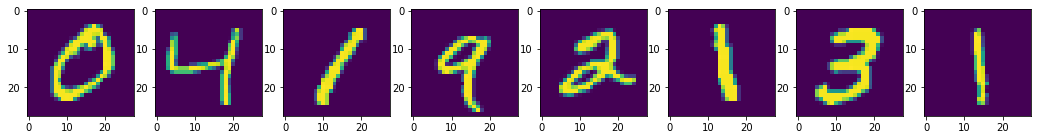

In [29]:
fig = plt.figure(figsize = (18 , 18))
for i  in range(1 , 9):
  fig.add_subplot(1 , 8 , i)
  plt.imshow(X_train[i][: , : , 0])
plt.show()

In [31]:
np.argmax(M.predict(X_train[1:9]) , axis = -1)

array([0, 4, 1, 9, 2, 1, 3, 1])